In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [49]:
# Load the dataset
df = pd.read_csv(r"C:\Users\aksha\Downloads\Employee (1).csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


#### 1. Data Exploration :
Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

In [61]:
# to prints the first five rows of the dataset
df.head()


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [63]:
# to display the last five rows of the dataset
df.tail()

,Company,Age,Salary,City,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [64]:
# to prints a summary of the dataset, including column names, non-null counts, and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   City     134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [65]:
# to print the column names in the dataframe
df.columns

Index(['Company', 'Age', 'Salary', 'City', 'Country', 'Gender'], dtype='object')

In [66]:
# to list down the unique values in each feature and find its length
unique_values = df.nunique()
print(unique_values)

Company     6
Age        29
Salary     40
City       11
Country     1
Gender      2
dtype: int64


In [68]:
feature_lengths = df.shape[1]
print("Number of features:", feature_lengths)

Number of features: 6


In [69]:
# to perform the statistical analysis
summary_stats = df.describe()
summary_stats

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [70]:
# renaming of the columns
df = df.rename(columns = {'Place':'City'})
df.head(0)

,Company,Age,Salary,City,Country,Gender


### 2. Data Cleaning:
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [72]:
# Find the missing and inappropriate values, treat them appropriately.
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company     8
Age        18
Salary     24
City       14
Country     0
Gender      0
dtype: int64


In [74]:
# Replace missing values with mean, median and mode 
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [75]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64


In [76]:
# Replace 0 with "Female" and 1 with "Male" (assuming 1 is the other value)
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,Female
1,Infosys,30.0,5312.467742,Mumbai,India,Female
2,TCS,35.0,2300.000000,Calcutta,India,Female
3,Infosys,40.0,3000.000000,Delhi,India,Female
4,TCS,23.0,4000.000000,Mumbai,India,Female
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,Male
144,Infosys,22.0,8787.000000,Calcutta,India,Male
145,Infosys,44.0,4034.000000,Delhi,India,Male
146,TCS,33.0,5034.000000,Mumbai,India,Male


In [77]:
# Remove all duplicate rows.
df.duplicated().sum()

4

In [78]:
df.shape

(148, 6)

In [79]:
df.drop_duplicates(inplace = True)

In [80]:
df.shape

(144, 6)

In [81]:
# Check for outliers in Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

print("Cleaned dataset:")
print(df.head())

Cleaned dataset:
   Company   Age       Salary      City Country  Gender
0      TCS  20.0  5312.467742   Chennai   India  Female
1  Infosys  30.0  5312.467742    Mumbai   India  Female
2      TCS  35.0  2300.000000  Calcutta   India  Female
3  Infosys  40.0  3000.000000     Delhi   India  Female
4      TCS  23.0  4000.000000    Mumbai   India  Female


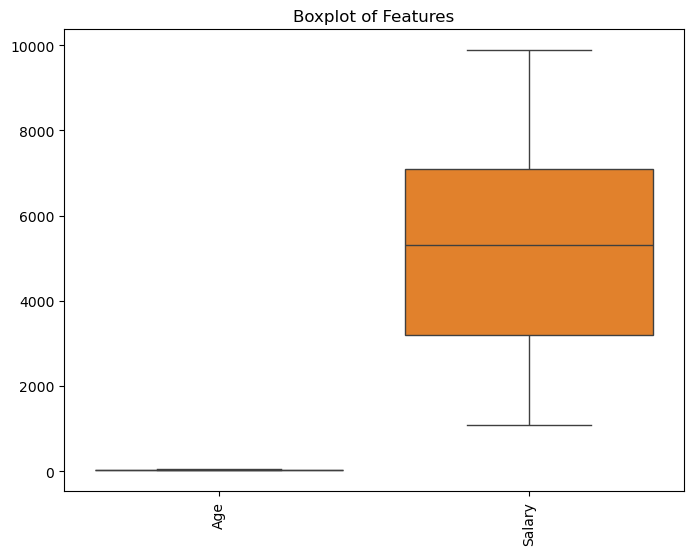

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.title("Boxplot of Features")
plt.show()

In [83]:
# Check for outliers in Salary column
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

print("Cleaned dataset:")
print(df.head())

Cleaned dataset:
   Company   Age       Salary      City Country  Gender
0      TCS  20.0  5312.467742   Chennai   India  Female
1  Infosys  30.0  5312.467742    Mumbai   India  Female
2      TCS  35.0  2300.000000  Calcutta   India  Female
3  Infosys  40.0  3000.000000     Delhi   India  Female
4      TCS  23.0  4000.000000    Mumbai   India  Female


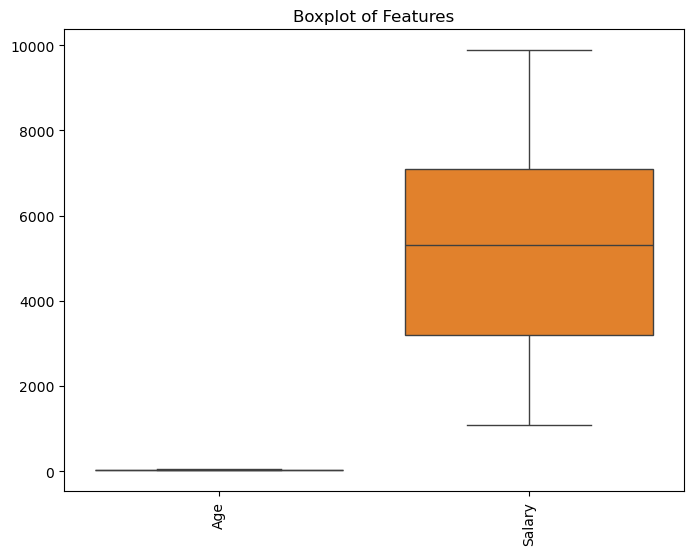

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.title("Boxplot of Features")
plt.show()

In [85]:
# Replace the value 0 in age as NaN
df['Age'] = df['Age'].replace(0, np.nan)
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,Female
1,Infosys,30.0,5312.467742,Mumbai,India,Female
2,TCS,35.0,2300.000000,Calcutta,India,Female
3,Infosys,40.0,3000.000000,Delhi,India,Female
4,TCS,23.0,4000.000000,Mumbai,India,Female
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,Female
143,TCS,33.0,9024.000000,Calcutta,India,Male
145,Infosys,44.0,4034.000000,Delhi,India,Male
146,TCS,33.0,5034.000000,Mumbai,India,Male


In [86]:
# Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
print(df.isnull().sum())

Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64


Here we can't find any null values.

### 3. Data Analysis:
Filter the data with age >40 and salary<5000 Plot the chart with age and salary. Count the number of people from each place and represent it visually

In [87]:
# Filtering data for individuals older than 40 years and earning less than 5000.
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_df

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,Female
32,Infosys,45.0,4034.0,Calcutta,India,Female
39,Infosys,41.0,3000.0,Mumbai,India,Female
50,Infosys,41.0,3000.0,Chennai,India,Female
57,Infosys,51.0,3184.0,Hyderabad,India,Female
68,Infosys,43.0,4034.0,Mumbai,India,Female
75,Infosys,44.0,3000.0,Cochin,India,Female
86,Infosys,41.0,3000.0,Delhi,India,Female
93,Infosys,54.0,3184.0,Mumbai,India,Female
104,Infosys,44.0,4034.0,Delhi,India,Female


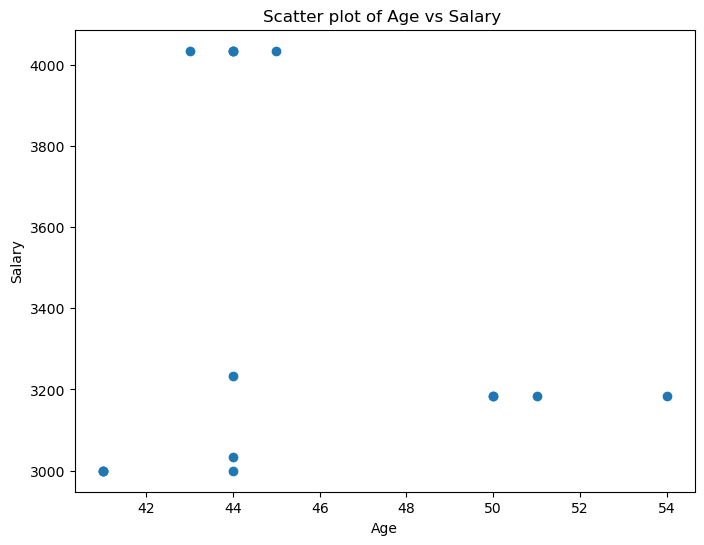

In [93]:
# Plot the chart with Age and Salary.
plt.figure(figsize=(8,6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter plot of Age vs Salary ')
plt.show()

In [91]:
# Count the number of people from each place and represent it visually.
city_counts = df['City'].value_counts()
print(city_counts)

City
Mumbai        47
Calcutta      30
Chennai       13
Delhi         13
Cochin        13
Noida          8
Hyderabad      8
Podicherry     2
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


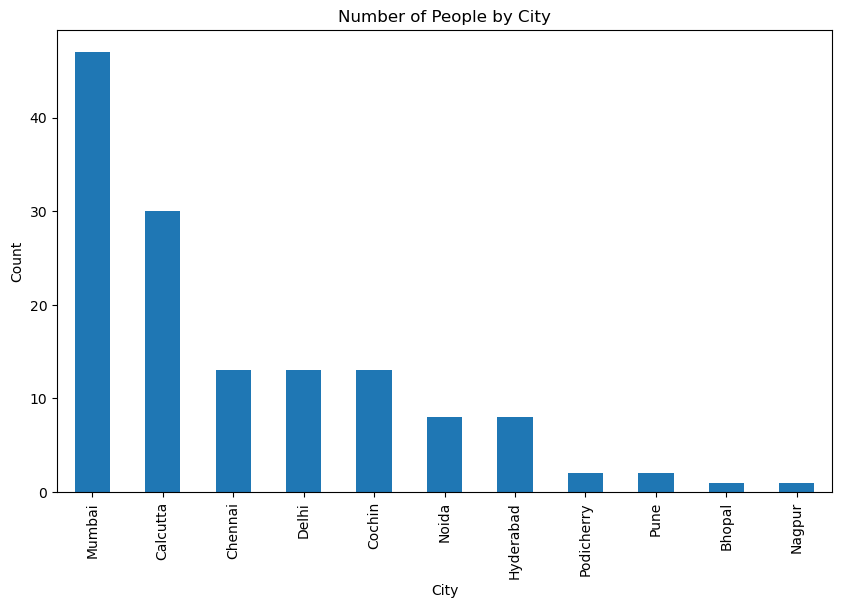

In [92]:
# Count people from each city.
city_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of People by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

### 4.Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [98]:
df

,Company,Age,Salary,City,Country,Gender
0,4,20.0,5312.467742,2,0,Female
1,2,30.0,5312.467742,6,0,Female
2,4,35.0,2300.000000,1,0,Female
3,2,40.0,3000.000000,4,0,Female
4,4,23.0,4000.000000,6,0,Female
...,...,...,...,...,...,...
142,3,22.0,8202.000000,6,0,Female
143,4,33.0,9024.000000,1,0,Male
145,2,44.0,4034.000000,4,0,Male
146,4,33.0,5034.000000,6,0,Male


In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
print("Original DataFrame:")
df.head()

Original DataFrame:


,Company,Age,Salary,City,Country,Gender
0,4,20.0,5312.467742,2,0,Female
1,2,30.0,5312.467742,6,0,Female
2,4,35.0,2300.000000,1,0,Female
3,2,40.0,3000.000000,4,0,Female
4,4,23.0,4000.000000,6,0,Female


In [101]:
# One-Hot Encoding (OHE)
df_ohe = pd.get_dummies(df, columns=['Gender', 'City', 'Country'])

In [102]:
print("\nOne-Hot Encoded DataFrame:")
df_ohe.head()


One-Hot Encoded DataFrame:


,Company,Age,Salary,Gender_Female,Gender_Male,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,Country_0
0,4,20.0,5312.467742,True,False,False,False,True,False,False,False,False,False,False,False,False,True
1,2,30.0,5312.467742,True,False,False,False,False,False,False,False,True,False,False,False,False,True
2,4,35.0,2300.000000,True,False,False,True,False,False,False,False,False,False,False,False,False,True
3,2,40.0,3000.000000,True,False,False,False,False,False,True,False,False,False,False,False,False,True
4,4,23.0,4000.000000,True,False,False,False,False,False,False,False,True,False,False,False,False,True


In [103]:
# Label Encoding (LE)
le = LabelEncoder()
df['Gender_LE'] = le.fit_transform(df['Gender'])
df['City_LE'] = le.fit_transform(df['City'])
df['Country_LE'] = le.fit_transform(df['Country'])

In [115]:
print("\nLabel Encoded DataFrame:")
df.head()


Label Encoded DataFrame:


,Company,Age,Salary,City,Country,Gender,Gender_LE,City_LE,Country_LE
0,4,20.0,5312.467742,2,0,Female,0,2,0
1,2,30.0,5312.467742,6,0,Female,0,6,0
2,4,35.0,2300.000000,1,0,Female,0,1,0
3,2,40.0,3000.000000,4,0,Female,0,4,0
4,4,23.0,4000.000000,6,0,Female,0,6,0


### 5. Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [135]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\aksha\Downloads\Employee (1).csv")

# Assuming df_ohe is obtained after encoding categorical features
df_ohe = df.copy()

# Select only the numerical columns
numerical_cols = df_ohe.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling
scaler_std = StandardScaler()
df_scaled_std = scaler_std.fit_transform(df_ohe[numerical_cols])
df_scaled_std = pd.DataFrame(df_scaled_std, columns=numerical_cols, index=df_ohe.index)

# Min-Max Scaling
scaler_mm = MinMaxScaler()
df_scaled_mm = scaler_mm.fit_transform(df_ohe[numerical_cols])
df_scaled_mm = pd.DataFrame(df_scaled_mm, columns=numerical_cols, index=df_ohe.index)

# Display results
print("Standard Scaled Data:\n", df_scaled_std.head())
print("\nMin-Max Scaled Data:\n", df_scaled_mm.head())


Standard Scaled Data:
         Age    Salary    Gender
0 -0.948501       NaN -0.535683
1 -0.043841       NaN -0.535683
2  0.408489 -1.175200 -0.535683
3  0.860819 -0.902122 -0.535683
4 -0.677103 -0.512010 -0.535683

Min-Max Scaled Data:
         Age    Salary  Gender
0  0.370370       NaN     0.0
1  0.555556       NaN     0.0
2  0.648148  0.137817     0.0
3  0.740741  0.217480     0.0
4  0.425926  0.331285     0.0
